<a href="https://colab.research.google.com/github/samuelk-CS/Assessment/blob/main/ML_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook try to train and evaluate multiple classification algorithms.

Load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

First load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:

!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-12-08 20:26:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100%  995K=0.02s

2022-12-08 20:26:58 (995 KB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File
load the data to the pandas dataframe 'df'

In [4]:
df = pd.read_csv('loan_train.csv') 
df.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


display the shape of the dataframe 'df'

In [5]:
 df.shape# replace the None
 

(346, 10)

### Convert to date time object
convert the 'due_date' and 'effective_date' columns to datetime object


In [ ]:
df['due_date'] = pd.to_datetime (df['due_date']) # replace the None
df['effective_date'] = pd.to_datetime (df['effective_date']) # replace the None
df.head()


# Data visualization and pre-processing


Show how many of each class is in 'loan_status' column


In [44]:
df['loan_status'].value_counts() # replace the None

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [45]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



Make a data visualization (histogram) out of the dataframe as shown in the reference visualization.Use the "Gender", "loan_status" and "Principal" columns for visualization. For visualization you can use seaborn, pyplot or any other library you are comfortable with.

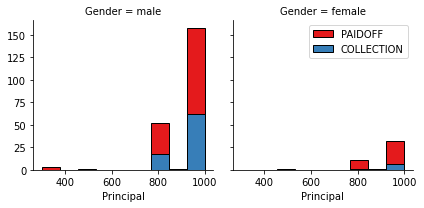

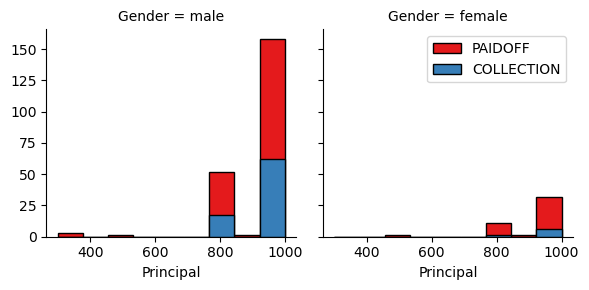

In [48]:
# code for data visualization
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()





Make a data visualization (histogram) out of the dataframe as shown in the reference visualization.Use the "Gender", "loan_status" and "age" columns for visualization.  For visualization you can use seaborn, pyplot or any other library you are comfortable with.

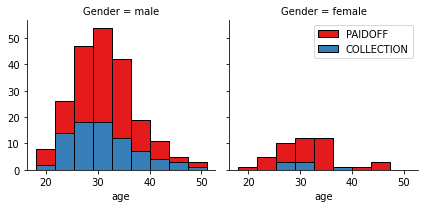

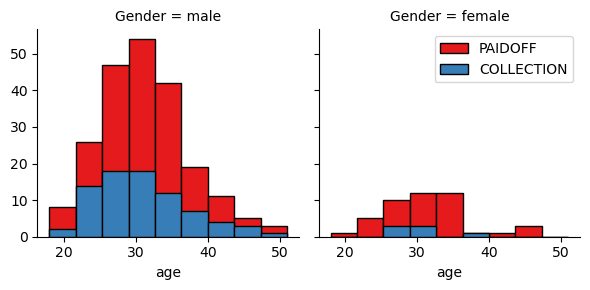

In [50]:
# code for data visualization
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()





# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan

Make a data visualization (histogram) out of the dataframe as shown in the reference visualization.Use the "Gender", "loan_status" and "dayofweek" columns for visualization.  For visualization you can use seaborn, pyplot or any other library you are comfortable with.

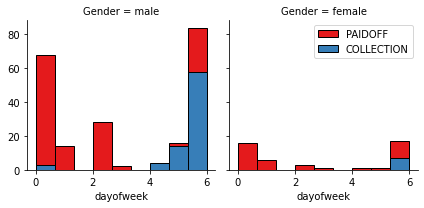


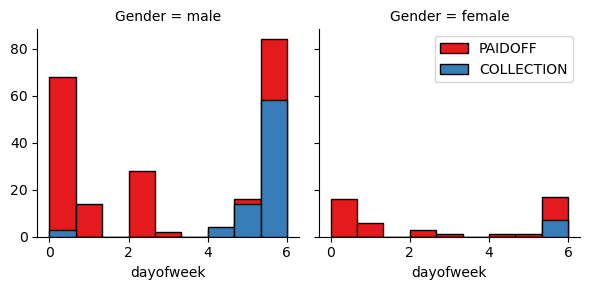

In [56]:
df['effective_date'] = pd.to_datetime (df['effective_date']) 
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()





We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [57]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male and female labels in Gender column into numerical features through encoding:


In [61]:
# Code to encode the 'Gender' column
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()







,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical variables 'education - column' to binary variables and append them to the feature Data Frame


In [62]:
# Code to encode 'education' column to binary values 

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)


# Code to display first 5 records of the features

Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [63]:
X = Feature # replace None with the FEATURES

X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [64]:
y = df['loan_status'].values # replace None with the TARGET

y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Normalize the features using 'StandardScaler'.


In [65]:
X= preprocessing.StandardScaler().fit(X).transform(X)# replace None with the code to normalize feature


X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [70]:
# Code to split the data into training and test set. (train:test) (80:20)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)



print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)


### Import library
Import the KNeighbors classifier from sklearn




In [71]:
from sklearn.neighbors import KNeighborsClassifier # replace None with the code

### Training

In [72]:
#Train the KNN Model 


k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train) # replace the None with the code to train the model
neigh

KNeighborsClassifier(n_neighbors=4)

### Predict

In [74]:
yhat = neigh.predict(X_test) # replace the None with the code to get the predications for X_test
yhat[0:5]



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluation

In [76]:
# Code to get the performance metrics of the trained model. Accuracy, f1 score, recall

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))






Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Decision Tree


In [ ]:
# Code to split the data into training and test set. (train:test) (70:30)




print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

### Import library

Import decision tree classifier from sklearn

In [78]:
from sklearn.tree import DecisionTreeClassifier # replace None with your code

### Training 

In [87]:
# Code to train the model


LoanTree = DecisionTreeClassifier(criterion="entropy")
LoanTree.fit(X_train,y_train)

LoanTree # it shows the  parameters

DecisionTreeClassifier(criterion='entropy')

### Predict

In [89]:
predTree = LoanTree.predict(X_test)
 # replace the None with the code to get the predications for X_testset
 
print (predTree [0:5])
print (y_test [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### Evaluation

In [90]:
# Code to get the performance metrics of the trained model. Accuracy, f1 score, recall
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))







DecisionTrees's Accuracy:  0.7


# Support Vector Machine


In [91]:
# Code to split the data into training and test set. (train:test) (70:30)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)




print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### Training

In [92]:
# Code to train the model
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train) 




SVC(kernel='linear')

### Predict

In [93]:
yhat = svc.predict(X_test) # replace the None with the code to get the predications for X_test

yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluate

use y_test and yhat to get the performance metrics of the model

In [94]:
# Code to get the performance metrics of the trained model. Accuracy, f1 score, recall
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

  COLLECTION       0.35      0.47      0.40        15
     PAIDOFF       0.84      0.76      0.80        55

    accuracy                           0.70        70
   macro avg       0.59      0.62      0.60        70
weighted avg       0.73      0.70      0.71        70



# Logistic Regression


In [95]:
# Code to split the data into training and test set. (train:test) (70:30)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)



print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### Import

Import logistic regression model from sklearn

In [96]:
# enter the code
from sklearn.linear_model import LogisticRegression


### Training

In [101]:
# Code to train the model

lr=LogisticRegression()


lr.fit(X_train, y_train) # replace the None with the code to train the model

LogisticRegression()

### Preditction

In [102]:

yhat = lr.predict(X_test) # replace the None with the code to get the predications for X_test
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluate

use y_test and yhat to get the performance metrics of the model

In [103]:
# Code to get the performance metrics of the trained model. Accuracy, f1 score, recall
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

  COLLECTION       0.35      0.47      0.40        15
     PAIDOFF       0.84      0.76      0.80        55

    accuracy                           0.70        70
   macro avg       0.59      0.62      0.60        70
weighted avg       0.73      0.70      0.71        70



# Model Evaluation metrics using Test set


| Algorithm          | Accuracy | F1-score | Precission |
| ------------------ | -------  | -------- | -------    |
| KNN                |  NA      |  NA      | NA         |
| Decision Tree      |  NA      |  NA      | NA         |
| SVM                |  NA      |  NA      | NA         |
| LogisticRegression |  NA      |  NA      | NA         |
